# <b><span style='color:#F1A424'>AutoML - Binary Classification - Wine Quality Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset used : Wine Quality Dataset**

**Features**:

- `fixed acidity`: fixed acidity of wine.
- `volatile acidity`: volatile acidity of wine.
- `citric acid`: citric acid of wine.
- `residual sugar`: residual sugar of wine.
- `chlorides`: chlorides.
- `free sulfur dioxide`: free sulfur dioxide in wine.
- `total sulfur dioxide`: total sulfur dioxide in wine.
- `density`: density of wine.
- `pH`: pH of wine.
- `sulphates`: sulphates in wine.
- `alcohol`: alcohol in wine.

**Target Variable**:

- `quality`: Quality of wine

        
**Objective**:

The primary objective is typically to build a model that can accurately predict the quality of wine.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoClassifier

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','wine_data')

In [5]:
# Fetching in teradata dataframe
wine_df = DataFrame("wine_data")

In [6]:
# first 5 rows
wine_df.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
5.1,0.47,0.02,1.3,0.034,18.0,44.0,0.9921,3.9,0.62,12.8,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [7]:
# wine_df dataset
wine_df.shape

(1599, 12)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
wine_df_sample = wine_df.sample(frac = [0.8, 0.2])

In [9]:
wine_df_sample.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,sampleid
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good,1
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good,1
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good,1
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good,2
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad,1
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good,1
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good,1
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad,1
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good,1
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad,1


In [10]:
# Fetching train and test data
wine_df_train= wine_df_sample[wine_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
wine_df_test = wine_df_sample[wine_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
wine_df_train.shape

(1279, 12)

In [12]:
# test data shape
wine_df_test.shape

(320, 12)

In [13]:
#train dataset
wine_df_train.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4.9,0.42,0.0,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,good
5.0,0.42,0.24,2.0,0.06,19.0,50.0,0.9917,3.72,0.74,14.0,good
5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,bad
5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,good
5.1,0.42,0.0,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.6,good
5.1,0.585,0.0,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9,good
5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.7,0.75,14.0,good
5.0,1.04,0.24,1.6,0.05,32.0,96.0,0.9934,3.74,0.62,11.5,bad
4.7,0.6,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.6,12.9,good
4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.9,0.56,13.1,bad


In [14]:
# test dataset
wine_df_test.head()

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,good
5.6,0.66,0.0,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,good
5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.994,3.5,0.48,9.8,bad
5.8,1.01,0.66,2.0,0.039,15.0,88.0,0.99357,3.66,0.6,11.5,good
5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,bad
5.9,0.29,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,good
5.8,0.61,0.11,1.8,0.066,18.0,28.0,0.99483,3.55,0.66,10.9,good
5.6,0.54,0.04,1.7,0.049,5.0,13.0,0.9942,3.72,0.58,11.4,bad
5.2,0.645,0.0,2.15,0.08,15.0,28.0,0.99444,3.78,0.61,12.5,good
5.0,0.4,0.5,4.3,0.046,29.0,80.0,0.9902,3.49,0.66,13.6,good


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoML instance
# Including 'svm' from model training.
# Keeping early stopping metrics threshold to 0.6 for 'MICRO-RECALL', early stopping timer threshold to 200 sec
# Using max_models 7
# and verbose level 2 for detailed loggging

aml = AutoML(task_type="Classification",
             include='svm',
             stopping_metric='MICRO-RECALL', 
             stopping_tolerance=0.60,
             max_runtime_secs=200,
             max_models=7,
             verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 1279
Total Columns in the data: 12

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
free_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
chlorides,FLOAT,1279,0,None,0,1279,0,0.0,100.0
density,FLOAT,1279,0,None,0,1279,0,0.0,100.0
total_sulfur_dioxide,FLOAT,1279,0,None,0,1279,0,0.0,100.0
quality,VARCHAR(20) CHARACTER SET LATIN,1279,0,0,None,None,None,0.0,100.0
residual_sugar,FLOAT,1279,0,None,0,1279,0,0.0,100.0
fixed_acidity,FLOAT,1279,0,None,0,1279,0,0.0,100.0
alcohol,FLOAT,1279,0,None,0,1279,0,0.0,100.0
sulphates,FLOAT,1279,0,None,0,1279,0,0.0,100.0
pH,FLOAT,1279,0,None,0,1279,0,0.0,100.0


       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol
func                                                                                                                                                              
50%            7.900             0.530        0.240           2.200      0.079               14.000                37.000     0.997     3.310      0.620    10.200
count       1279.000          1279.000     1279.000        1279.000   1279.000             1279.000              1279.000  1279.000  1279.000   1279.000  1279.000
mean           8.290             0.535        0.262           2.534      0.088               15.764                46.369     0.997     3.314      0.658    10.426
min            4.600             0.120        0.000           0.900      0.012                1.000                 6.000     0.990     2.740      0.330     8.400
max           15.900  

func,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
50%,7.9,0.53,0.24,2.2,0.079,14,37,0.997,3.31,0.62,10.2
count,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279,1279
mean,8.29,0.535,0.262,2.534,0.088,15.764,46.369,0.997,3.314,0.658,10.426
min,4.6,0.12,0,0.9,0.012,1,6,0.99,2.74,0.33,8.4
max,15.9,1.58,1,15.4,0.611,68,289,1.004,4.01,2,14.9
75%,9.1,0.64,0.42,2.6,0.091,21,63,0.998,3.4,0.73,11.1
25%,7.1,0.4,0.08,1.9,0.07,7,22,0.996,3.21,0.55,9.5
std,1.733,0.179,0.195,1.381,0.05,10.231,32.805,0.002,0.156,0.171,1.077



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
quality                   2         

No Futile columns found.

Target Column Distribution:


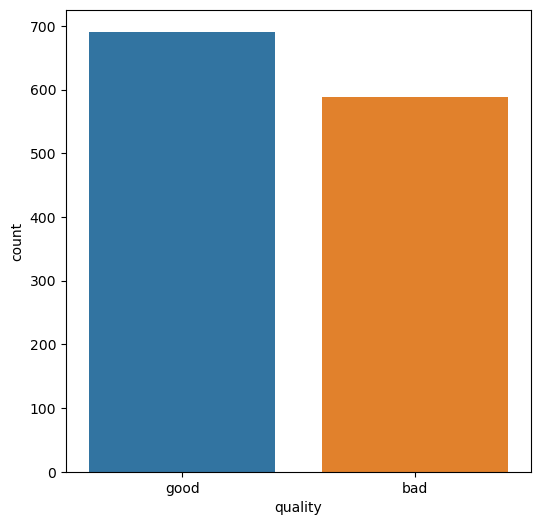

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0        residual_sugar           9.616888
1             sulphates           3.674746
2         fixed_acidity           3.518374
3               alcohol           0.938233
4           citric_acid           0.078186
5   free_sulfur_dioxide           1.563722
6                    pH           2.345582
7      volatile_acidity           1.329163
8  total_sulfur_dioxide           3.049257
9               density           2.814699


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.0014,3.06,0.8,10.0,good
8.4,0.29,0.4,1.7,0.067,8.0,20.0,0.99603,3.39,0.6,10.5,bad
8.4,0.25,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5,good
7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.9933,3.38,0.88,13.6,good
8.6,0.37,0.65,6.4,0.08,3.0,8.0,0.99817,3.27,0.58,11.0,bad
8.6,0.47,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.8,11.2,bad
10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.9978,3.15,0.9,11.0,good
10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.9976,3.21,1.05,10.8,good
8.2,0.885,0.2,1.4,0.086,7.0,31.0,0.9946,3.11,0.46,10.0,bad
8.2,0.28,0.6,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,bad


Remaining Rows in the data: 1115                                                        
Remaining Columns in the data: 12


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
             ColumnName  OutlierPercentage
0  total_sulfur_dioxide           2.869955
1             sulphates           4.484305
2      volatile_acidity           1.524664
3             chlorides           7.174888
4               alcohol           0.986547
5         fixed_acidity           3.497758
6           citric_acid           0.089686
7                    pH           2.331839
8               density           2.690583
9        residual_sugar           9.237668


['pH', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'volatile_acidity', 'chlorides', 'density', 'alcohol', 'sulphates', 'fixed_acidity', 'citric_acid']


density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,id,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar,quality
0.99472,3.52,11.4,0.056,13.0,6.1,0.59,365,0.01,5.0,0.56,2.1,0
0.9974,3.26,9.6,0.076,23.0,8.3,0.26,350,0.37,8.0,0.7,1.4,1
0.9974,3.21,9.4,0.08,27.0,8.3,0.26,310,0.42,11.0,0.8,2.0,1
0.9974,3.22,10.9,0.062,22.0,8.2,0.24,119,0.34,8.0,0.94,5.1,1
0.9974,3.25,9.2,0.074,66.0,7.8,0.55,160,0.35,21.0,0.56,2.2,0
0.9974,3.27,9.3,0.09,19.0,7.7,0.665,667,0.0,8.0,0.73,2.4,0
0.9974,3.34,10.5,0.06,121.0,7.0,0.49,655,0.49,26.0,0.76,5.6,0
0.99472,3.23,11.3,0.056,29.0,7.2,0.38,316,0.31,15.0,0.76,2.0,1
0.99542,3.35,10.7,0.042,12.0,8.1,0.33,1220,0.44,6.0,0.61,1.5,0
0.99729,3.16,9.8,0.079,65.0,9.8,0.37,563,0.39,28.0,0.59,2.5,0


['residual_sugar']


density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,id,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar,quality
0.99552,3.41,11.9,0.075,21.0,8.9,0.12,1227,0.45,10.0,0.76,1.8,1
0.9952,3.28,11.3,0.062,34.0,7.7,0.28,699,0.3,18.0,0.9,2.0,1
0.9952,3.2,9.8,0.07,48.0,8.7,0.82,1018,0.02,36.0,0.58,1.2,0
0.9952,3.34,13.3,0.055,25.0,9.2,0.41,534,0.5,12.0,0.79,2.5,1
0.9952,3.52,12.3,0.059,48.0,6.6,0.84,529,0.03,32.0,0.56,2.3,1
0.9952,3.35,12.1,0.064,37.0,7.3,0.34,359,0.33,21.0,0.77,2.5,1
0.9952,3.44,12.1,0.051,91.0,6.5,0.39,1212,0.23,28.0,0.55,2.2,1
0.9952,3.4,9.8,0.06,26.0,6.6,0.5,561,0.01,17.0,0.58,1.5,1
0.99552,3.33,9.7,0.064,34.0,6.7,0.48,750,0.08,18.0,0.64,2.1,0
0.99552,3.23,11.1,0.067,10.0,9.1,0.21,990,0.37,6.0,0.58,1.6,1


['density', 'pH', 'alcohol', 'chlorides', 'total_sulfur_dioxide', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar']


['density', 'pH', 'alcohol', 'chlorides', 'total_sulfur_dioxide', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar']


quality,id,density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar
0,13,0.6781609195402373,0.4459459459459459,0.4893617021276596,0.5000000000000001,0.01652892561983471,0.5072463768115941,0.2840909090909091,0.8333333333333334,0.047619047619047616,0.390625,0.4166666666666667
0,15,0.2643678160919653,0.22972972972972958,0.27659574468085113,0.5769230769230769,0.2066115702479339,0.4492753623188405,0.8693181818181819,0.25641025641025644,0.14285714285714285,0.20312500000000003,0.0833333333333333
1,17,0.563218390804604,0.8648648648648648,0.3829787234042554,0.5897435897435898,0.2644628099173554,0.3478260869565218,0.4545454545454546,0.5384615384615384,0.16666666666666666,0.4375,0.4583333333333332
0,19,0.4942528735632317,0.7432432432432434,0.3829787234042554,0.5256410256410258,0.23140495867768596,0.3333333333333334,0.4886363636363637,0.24358974358974358,0.3333333333333333,0.5468750000000001,0.25
0,21,0.3333333333333376,0.3243243243243245,0.5319148936170212,0.1794871794871795,0.18181818181818182,0.5072463768115941,0.3977272727272727,0.34615384615384615,0.30952380952380953,0.7343750000000001,0.4583333333333332
1,22,0.6666666666666752,0.5135135135135133,0.17021276595744692,0.6666666666666667,0.7603305785123967,0.5652173913043479,0.3863636363636364,0.3974358974358974,0.42857142857142855,0.46875000000000006,0.6666666666666665
1,20,0.18390804597701824,0.4459459459459459,0.8085106382978723,0.0,0.03305785123966942,0.47826086956521746,0.14772727272727273,0.5,0.07142857142857142,0.59375,0.3333333333333333
0,14,0.6091954022988649,0.47297297297297297,0.3617021276595746,0.46153846153846156,0.05785123966942149,0.5652173913043479,0.6136363636363636,0.21794871794871795,0.09523809523809523,0.3437500000000001,0.7499999999999999
0,12,0.4252873563218467,0.6081081081081082,0.3829787234042554,0.3333333333333334,0.11570247933884298,0.47826086956521746,0.19318181818181818,0.5128205128205129,0.16666666666666666,0.421875,0.20833333333333331
1,10,0.632183908045989,0.28378378378378366,0.4893617021276596,0.3205128205128206,0.1487603305785124,0.782608695652174,0.13636363636363635,0.6025641025641025,0.11904761904761904,0.8906250000000002,0.375


['density', 'pH', 'alcohol', 'chlorides', 'total_sulfur_dioxide', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'sulphates']


['r_density', 'r_pH', 'r_alcohol', 'r_chlorides', 'r_total_sulfur_dioxide', 'r_fixed_acidity', 'r_volatile_acidity', 'r_citric_acid', 'r_free_sulfur_dioxide', 'r_sulphates']


quality,id,r_density,r_pH,r_alcohol,r_chlorides,r_total_sulfur_dioxide,r_fixed_acidity,r_volatile_acidity,r_citric_acid,r_free_sulfur_dioxide,r_sulphates
0,13,0.6781609195402373,0.4459459459459459,0.4893617021276596,0.5000000000000001,0.01652892561983471,0.5072463768115941,0.2840909090909091,0.8333333333333334,0.047619047619047616,0.390625
0,15,0.2643678160919653,0.22972972972972958,0.27659574468085113,0.5769230769230769,0.2066115702479339,0.4492753623188405,0.8693181818181819,0.25641025641025644,0.14285714285714285,0.20312500000000003
1,17,0.563218390804604,0.8648648648648648,0.3829787234042554,0.5897435897435898,0.2644628099173554,0.3478260869565218,0.4545454545454546,0.5384615384615384,0.16666666666666666,0.4375
0,19,0.4942528735632317,0.7432432432432434,0.3829787234042554,0.5256410256410258,0.23140495867768596,0.3333333333333334,0.4886363636363637,0.24358974358974358,0.3333333333333333,0.5468750000000001
0,21,0.3333333333333376,0.3243243243243245,0.5319148936170212,0.1794871794871795,0.18181818181818182,0.5072463768115941,0.3977272727272727,0.34615384615384615,0.30952380952380953,0.7343750000000001
1,22,0.6666666666666752,0.5135135135135133,0.17021276595744692,0.6666666666666667,0.7603305785123967,0.5652173913043479,0.3863636363636364,0.3974358974358974,0.42857142857142855,0.46875000000000006
1,20,0.18390804597701824,0.4459459459459459,0.8085106382978723,0.0,0.03305785123966942,0.47826086956521746,0.14772727272727273,0.5,0.07142857142857142,0.59375
0,14,0.6091954022988649,0.47297297297297297,0.3617021276595746,0.46153846153846156,0.05785123966942149,0.5652173913043479,0.6136363636363636,0.21794871794871795,0.09523809523809523,0.3437500000000001
0,12,0.4252873563218467,0.6081081081081082,0.3829787234042554,0.3333333333333334,0.11570247933884298,0.47826086956521746,0.19318181818181818,0.5128205128205129,0.16666666666666666,0.421875
1,10,0.632183908045989,0.28378378378378366,0.4893617021276596,0.3205128205128206,0.1487603305785124,0.782608695652174,0.13636363636363635,0.6025641025641025,0.11904761904761904,0.8906250000000002


['density', 'pH', 'alcohol', 'chlorides', 'total_sulfur_dioxide', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_sulfur_dioxide', 'sulphates', 'residual_sugar']


quality,id,density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar
1,431,0.4774566473988565,0.8918918918918918,0.5106382978723404,0.4743589743589744,0.5041322314049587,0.31884057971014496,0.3522727272727273,0.30769230769230765,0.6190476190476191,0.40625,0.5416666666666666
0,563,0.5710982658959645,0.2972972972972975,0.23404255319148962,0.4871794871794873,0.48760330578512395,0.6811594202898552,0.2840909090909091,0.5,0.6428571428571429,0.40625,0.5416666666666666
0,1220,0.3549132947976925,0.5540540540540541,0.4255319148936169,0.012820512820512834,0.049586776859504134,0.43478260869565216,0.23863636363636365,0.5641025641025641,0.11904761904761904,0.4375,0.125
1,274,0.04046242774567342,0.8108108108108107,0.7446808510638296,0.16666666666666666,0.8264462809917356,0.014492753623188482,0.40909090909090906,0.05128205128205128,0.42857142857142855,0.45312500000000006,0.16666666666666669
1,215,0.20000000000000256,0.39189189189189183,0.7021276595744681,0.20512820512820518,0.5619834710743802,0.4492753623188405,0.25000000000000006,0.47435897435897434,1.0,0.7500000000000002,0.29166666666666663
1,206,0.20000000000000256,0.43243243243243207,0.7872340425531915,0.6666666666666667,0.049586776859504134,0.4637681159420291,0.18181818181818185,0.6153846153846153,0.11904761904761904,0.45312500000000006,0.375
1,990,0.3664739884393098,0.39189189189189183,0.5106382978723404,0.3333333333333334,0.03305785123966942,0.5797101449275363,0.10227272727272727,0.47435897435897434,0.11904761904761904,0.390625,0.16666666666666669
0,750,0.3664739884393098,0.5270270270270271,0.21276595744680846,0.29487179487179493,0.23140495867768596,0.23188405797101455,0.40909090909090906,0.10256410256410256,0.40476190476190477,0.48437500000000006,0.375
1,44,0.3109826589595493,0.5945945945945944,0.6595744680851066,0.3974358974358974,0.3305785123966942,0.47826086956521746,0.5681818181818182,0.15384615384615383,0.8809523809523809,0.8750000000000002,0.25
0,996,0.5248554913294952,0.878378378378378,0.23404255319148962,0.5128205128205129,0.2066115702479339,0.18840579710144936,0.5909090909090909,0.2692307692307692,0.30952380952380953,0.5156250000000001,0.25


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8']


response_column : quality                                                                                                                             
name : svm
model_type : Classification
lambda1 : (0.001, 0.02, 0.1)
alpha : (0.15, 0.85)
tolerance : (0.001, 0.01)
learning_rate : OPTIMAL
initial_eta : (0.05, 0.1)
momentum : (0.65, 0.8, 0.95)
nesterov : True
intercept : True
iter_num_no_change : (5, 10, 50)
local_sgd_iterations  : (10, 20)
iter_max : (300, 200, 400)
batch_size : (10, 50, 60, 80)
Total number of models for svm : 5184
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,SVM_3,rfe,0.659218,0.659218,0.659218,0.659218,0.661452,0.661898,0.659175,0.664679,0.659218,0.659452
1,2,SVM_2,lasso,0.625698,0.625698,0.625698,0.625698,0.632074,0.611885,0.603891,0.630907,0.625698,0.610641
2,3,SVM_4,rfe,0.519553,0.519553,0.519553,0.519553,0.557104,0.539847,0.490130,0.562035,0.519553,0.481234
3,4,SVM_1,lasso,0.508380,0.508380,0.508380,0.508380,0.543766,0.529430,0.475213,0.548233,0.508380,0.465632
4,5,SVM_0,lasso,0.486034,0.486034,0.486034,0.486034,0.515944,0.509413,0.440625,0.519325,0.486034,0.429050


In [16]:
# Fitting train data
aml.fit(wine_df_train, wine_df_train.quality)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,SVM_3,rfe,0.659218,0.659218,0.659218,0.659218,0.661452,0.661898,0.659175,0.664679,0.659218,0.659452
1,2,SVM_2,lasso,0.625698,0.625698,0.625698,0.625698,0.632074,0.611885,0.603891,0.630907,0.625698,0.610641
2,3,SVM_4,rfe,0.519553,0.519553,0.519553,0.519553,0.557104,0.539847,0.490130,0.562035,0.519553,0.481234
3,4,SVM_1,lasso,0.508380,0.508380,0.508380,0.508380,0.543766,0.529430,0.475213,0.548233,0.508380,0.465632
4,5,SVM_0,lasso,0.486034,0.486034,0.486034,0.486034,0.515944,0.509413,0.440625,0.519325,0.486034,0.429050


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,ACCURACY,MICRO-PRECISION,MICRO-RECALL,MICRO-F1,MACRO-PRECISION,MACRO-RECALL,MACRO-F1,WEIGHTED-PRECISION,WEIGHTED-RECALL,WEIGHTED-F1
0,1,SVM_3,rfe,0.659218,0.659218,0.659218,0.659218,0.661452,0.661898,0.659175,0.664679,0.659218,0.659452


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=1)

{'response_column': 'quality',
 'name': 'svm',
 'model_type': 'Classification',
 'lambda1': 0.02,
 'alpha': 0.15,
 'tolerance': 0.001,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.1,
 'momentum': 0.65,
 'nesterov': True,
 'intercept': True,
 'iter_num_no_change': 50,
 'local_sgd_iterations ': 20,
 'iter_max': 300,
 'batch_size': 60,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 3}

In [20]:
aml.model_hyperparameters(rank=4)

{'response_column': 'quality',
 'name': 'svm',
 'model_type': 'Classification',
 'lambda1': 0.001,
 'alpha': 0.15,
 'tolerance': 0.001,
 'learning_rate': 'OPTIMAL',
 'initial_eta': 0.05,
 'momentum': 0.95,
 'nesterov': True,
 'intercept': True,
 'iter_num_no_change': 50,
 'local_sgd_iterations ': 20,
 'iter_max': 300,
 'batch_size': 10,
 'persist': False,
 'output_prob': True,
 'output_responses': ['1', '0'],
 'max_models': 3}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(wine_df_test,2)

Data Transformation started ...


density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,id,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar,quality
1.0001,3.05,9.5,0.073,27.0,10.8,0.5,387,0.46,5.0,0.64,2.5,0
0.99356,3.34,12.9,0.068,42.0,7.2,0.38,52,0.38,23.0,0.72,2.8,1
1.0002,3.48,11.6,0.086,81.0,8.7,0.69,314,0.31,23.0,0.74,3.0,1
0.99855,3.36,9.5,0.09,13.0,8.1,0.78,396,0.1,4.0,0.49,3.3,0
0.99552,3.41,11.9,0.075,21.0,8.9,0.12,315,0.45,10.0,0.76,1.8,1
0.9952,3.5,11.1,0.063,67.0,7.0,0.23,183,0.4,21.0,0.63,1.6,0
0.994,3.5,9.8,0.172,19.0,5.7,1.13,318,0.09,7.0,0.48,1.5,0
0.9962,3.44,10.7,0.076,15.0,6.6,0.705,193,0.07,6.0,0.58,1.6,0
0.99648,3.36,10.4,0.09,23.0,8.5,0.21,90,0.52,9.0,0.67,1.9,0
0.99498,3.27,12.1,0.09,24.0,8.3,0.3,62,0.49,11.0,0.64,3.8,1


id,density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar,quality
106,0.998,3.33,9.8,0.078,58.0,8.5,0.46,0.31,32.0,0.54,2.25,0
71,0.9976,3.28,9.4,0.078,104.0,8.2,0.56,0.23,14.0,0.62,3.4,0
210,0.9976,3.34,9.4,0.075,48.0,8.0,0.43,0.36,10.0,0.46,2.3,0
54,0.9976,3.31,9.2,0.084,43.0,8.3,0.675,0.26,11.0,0.53,2.1,0
391,0.9976,3.17,10.0,0.054,17.0,10.2,0.67,0.39,6.0,0.47,1.9,0
316,0.9976,3.46,9.5,0.086,45.0,7.1,0.66,0.0,17.0,0.54,3.9,0
197,0.9957,3.02,10.9,0.06,10.0,11.1,0.31,0.53,3.0,0.83,2.2,1
83,0.9997,3.21,10.9,0.073,23.0,11.7,0.45,0.63,7.0,0.69,2.2,1
199,0.9956,3.4,10.1,0.086,69.0,7.0,0.36,0.21,24.0,0.53,2.4,1
452,0.998,3.19,10.0,0.092,45.0,9.4,0.43,0.24,14.0,0.73,2.8,1


quality,id,density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar
1,199,0.3793103448275985,0.6216216216216214,0.2978723404255319,0.5769230769230769,0.5206611570247934,0.27536231884057977,0.2727272727272727,0.2692307692307692,0.5476190476190477,0.31250000000000006,0.4999999999999999
1,136,0.6091954022988649,0.41891891891891886,0.4468085106382981,0.4358974358974359,0.12396694214876033,0.7681159420289856,0.13636363636363635,0.5897435897435898,0.11904761904761904,1.078125,0.25
1,327,0.6091954022988649,0.27027027027027045,0.23404255319148962,0.2820512820512821,0.2809917355371901,0.7971014492753623,0.2159090909090909,0.6282051282051282,0.40476190476190477,0.28125000000000006,0.4166666666666667
1,436,0.6091954022988649,0.2432432432432434,0.7021276595744681,0.4871794871794873,0.19834710743801653,0.6231884057971016,0.23863636363636365,0.7564102564102564,0.19047619047619047,0.32812500000000006,0.6666666666666665
1,158,0.7471264367816223,0.0,0.10638297872340423,0.5256410256410258,0.0743801652892562,0.8985507246376813,0.25000000000000006,0.5769230769230769,0.11904761904761904,0.5156250000000001,0.3333333333333333
1,75,0.5862068965517281,0.8648648648648648,0.4468085106382981,0.5000000000000001,0.2231404958677686,0.3333333333333334,0.5852272727272727,0.12820512820512822,0.35714285714285715,0.5625,0.4999999999999999
0,351,1.1839080459770182,0.2432432432432434,0.10638297872340423,0.3589743589743591,0.14049586776859505,0.7971014492753623,0.18181818181818185,0.5,0.11904761904761904,0.5156250000000001,5.958333333333333
0,220,0.6551724137931131,0.45945945945945915,0.23404255319148962,0.4743589743589744,0.5867768595041323,0.6956521739130436,0.7045454545454546,0.358974358974359,0.47619047619047616,0.28125000000000006,0.5833333333333333
0,106,0.6551724137931131,0.5270270270270271,0.23404255319148962,0.4743589743589744,0.4297520661157025,0.4927536231884058,0.3863636363636364,0.3974358974358974,0.7380952380952381,0.32812500000000006,0.43749999999999994
0,254,0.6551724137931131,0.3243243243243245,0.17021276595744692,0.5256410256410258,0.1652892561983471,0.6376811594202899,0.2840909090909091,0.6666666666666666,0.11904761904761904,0.28125000000000006,0.3333333333333333


id,density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,sulphates,quality
199,0.9956,3.4,10.1,0.086,69.0,7.0,0.36,0.21,24.0,0.53,1
136,0.9976,3.25,10.8,0.075,21.0,10.4,0.24,0.46,6.0,1.02,1
327,0.9976,3.14,9.8,0.063,40.0,10.6,0.31,0.49,18.0,0.51,1
436,0.9976,3.12,12.0,0.079,30.0,9.4,0.33,0.59,9.0,0.54,1
158,0.9988,2.94,9.2,0.082,15.0,11.3,0.34,0.45,6.0,0.66,1
75,0.9974,3.58,10.8,0.08,33.0,7.4,0.635,0.1,16.0,0.69,1
351,1.0026,3.12,9.2,0.069,23.0,10.6,0.28,0.39,6.0,0.66,0
220,0.998,3.28,9.8,0.078,77.0,9.9,0.74,0.28,21.0,0.51,0
106,0.998,3.33,9.8,0.078,58.0,8.5,0.46,0.31,32.0,0.54,0
254,0.998,3.18,9.5,0.082,26.0,9.5,0.37,0.52,6.0,0.51,0


quality,id,r_density,r_pH,r_alcohol,r_chlorides,r_total_sulfur_dioxide,r_fixed_acidity,r_volatile_acidity,r_citric_acid,r_free_sulfur_dioxide,r_sulphates
1,199,0.3793103448275985,0.6216216216216214,0.2978723404255319,0.5769230769230769,0.5206611570247934,0.27536231884057977,0.2727272727272727,0.2692307692307692,0.5476190476190477,0.31250000000000006
1,136,0.6091954022988649,0.41891891891891886,0.4468085106382981,0.4358974358974359,0.12396694214876033,0.7681159420289856,0.13636363636363635,0.5897435897435898,0.11904761904761904,1.078125
1,327,0.6091954022988649,0.27027027027027045,0.23404255319148962,0.2820512820512821,0.2809917355371901,0.7971014492753623,0.2159090909090909,0.6282051282051282,0.40476190476190477,0.28125000000000006
1,436,0.6091954022988649,0.2432432432432434,0.7021276595744681,0.4871794871794873,0.19834710743801653,0.6231884057971016,0.23863636363636365,0.7564102564102564,0.19047619047619047,0.32812500000000006
1,158,0.7471264367816223,0.0,0.10638297872340423,0.5256410256410258,0.0743801652892562,0.8985507246376813,0.25000000000000006,0.5769230769230769,0.11904761904761904,0.5156250000000001
1,75,0.5862068965517281,0.8648648648648648,0.4468085106382981,0.5000000000000001,0.2231404958677686,0.3333333333333334,0.5852272727272727,0.12820512820512822,0.35714285714285715,0.5625
0,351,1.1839080459770182,0.2432432432432434,0.10638297872340423,0.3589743589743591,0.14049586776859505,0.7971014492753623,0.18181818181818185,0.5,0.11904761904761904,0.5156250000000001
0,220,0.6551724137931131,0.45945945945945915,0.23404255319148962,0.4743589743589744,0.5867768595041323,0.6956521739130436,0.7045454545454546,0.358974358974359,0.47619047619047616,0.28125000000000006
0,106,0.6551724137931131,0.5270270270270271,0.23404255319148962,0.4743589743589744,0.4297520661157025,0.4927536231884058,0.3863636363636364,0.3974358974358974,0.7380952380952381,0.32812500000000006
0,254,0.6551724137931131,0.3243243243243245,0.17021276595744692,0.5256410256410258,0.1652892561983471,0.6376811594202899,0.2840909090909091,0.6666666666666666,0.11904761904761904,0.28125000000000006


quality,id,density,pH,alcohol,chlorides,total_sulfur_dioxide,fixed_acidity,volatile_acidity,citric_acid,free_sulfur_dioxide,sulphates,residual_sugar
1,199,0.3757225433526139,0.6216216216216214,0.2978723404255319,0.5769230769230769,0.5206611570247934,0.27536231884057977,0.2727272727272727,0.2692307692307692,0.5476190476190477,0.31250000000000006,0.4999999999999999
1,136,0.6069364161849858,0.41891891891891886,0.4468085106382981,0.4358974358974359,0.12396694214876033,0.7681159420289856,0.13636363636363635,0.5897435897435898,0.11904761904761904,1.078125,0.25
1,327,0.6069364161849858,0.27027027027027045,0.23404255319148962,0.2820512820512821,0.2809917355371901,0.7971014492753623,0.2159090909090909,0.6282051282051282,0.40476190476190477,0.28125000000000006,0.4166666666666667
1,436,0.6069364161849858,0.2432432432432434,0.7021276595744681,0.4871794871794873,0.19834710743801653,0.6231884057971016,0.23863636363636365,0.7564102564102564,0.19047619047619047,0.32812500000000006,0.6666666666666665
1,158,0.7456647398844063,0.0,0.10638297872340423,0.5256410256410258,0.0743801652892562,0.8985507246376813,0.25000000000000006,0.5769230769230769,0.11904761904761904,0.5156250000000001,0.3333333333333333
1,75,0.5838150289017383,0.8648648648648648,0.4468085106382981,0.5000000000000001,0.2231404958677686,0.3333333333333334,0.5852272727272727,0.12820512820512822,0.35714285714285715,0.5625,0.4999999999999999
0,351,1.1849710982659025,0.2432432432432434,0.10638297872340423,0.3589743589743591,0.14049586776859505,0.7971014492753623,0.18181818181818185,0.5,0.11904761904761904,0.5156250000000001,5.958333333333333
0,220,0.653179190751455,0.45945945945945915,0.23404255319148962,0.4743589743589744,0.5867768595041323,0.6956521739130436,0.7045454545454546,0.358974358974359,0.47619047619047616,0.28125000000000006,0.5833333333333333
0,106,0.653179190751455,0.5270270270270271,0.23404255319148962,0.4743589743589744,0.4297520661157025,0.4927536231884058,0.3863636363636364,0.3974358974358974,0.7380952380952381,0.32812500000000006,0.43749999999999994
0,254,0.653179190751455,0.3243243243243245,0.17021276595744692,0.5256410256410258,0.1652892561983471,0.6376811594202899,0.2840909090909091,0.6666666666666666,0.11904761904761904,0.28125000000000006,0.3333333333333333


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,quality
0,197,0.684889,-0.523233,0.042913,-0.158496,0.002046,-0.225629,0.077652,0.053522,-0.229444,1
1,351,1.564600,0.918665,-0.292689,3.642513,-0.519686,-0.799230,-2.499366,-1.567528,-2.040431,0
2,83,0.787066,-0.192827,-0.116065,0.009370,0.067339,-0.216856,-0.020273,0.060460,0.222204,1
3,220,0.145511,0.428416,-0.066139,0.074178,-0.190245,-0.249154,-0.041534,0.024806,0.113606,0
4,199,-0.134195,0.238059,0.211367,-0.033586,-0.074076,0.229912,-0.141719,-0.127333,-0.042036,1
5,106,0.100428,0.356480,0.159613,-0.090386,0.005038,-0.030276,-0.021394,-0.248723,0.152111,0
6,452,0.338139,0.143237,-0.100403,0.164592,0.060788,0.008174,0.045248,-0.068831,-0.237818,1
7,254,0.479019,-0.071440,-0.259450,-0.268546,-0.065863,0.069958,-0.155351,-0.034713,0.086763,0
8,136,0.597632,-0.387836,0.099154,-0.075773,0.455083,-0.038885,0.185554,0.153553,-0.138157,1
9,71,0.108990,0.513310,0.037014,0.224792,-0.087218,-0.122758,-0.339096,0.131029,-0.293100,0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : SVM_2 
Feature Selection Method : lasso

Target Column Mapping:
good: 1
bad: 0

Prediction : 
    id  prediction    prob_0    prob_1  quality
0  199           1  0.405051  0.594949        1
1  136           1  0.021401  0.978599        1
2  327           1  0.033643  0.966357        1
3  436           1  0.016609  0.983391        1
4  158           1  0.012819  0.987181        1
5   75           0  0.502598  0.497402        1
6  351           1  0.001458  0.998542        0
7  220           1  0.274490  0.725510        0
8  106           1  0.190547  0.809453        0
9  254           1  0.045625  0.954375        0

ROC-AUC : 


AUC,GINI
0.6558982176360225,0.31179643527204504


threshold_value,tpr,fpr
0.04081632653061224,1.0,1.0
0.08163265306122448,1.0,1.0
0.1020408163265306,1.0,1.0
0.12244897959183673,1.0,1.0
0.16326530612244897,1.0,0.9935897435897436
0.18367346938775508,0.9878048780487805,0.9871794871794872
0.14285714285714285,1.0,1.0
0.061224489795918366,1.0,1.0
0.02040816326530612,1.0,1.0
0.0,1.0,1.0



Confusion Matrix : 


array([[ 44, 112],
       [ 23, 141]], dtype=int64)

In [22]:
# Printing prediction
prediction.head()

id,prediction,prob_0,prob_1,quality
10,1,0.02332023517004822,0.9766797648299518,1
12,1,0.1815964318325931,0.8184035681674069,0
13,1,0.0017397914230462552,0.9982602085769537,0
14,0,0.6373726416225336,0.3626273583774664,0
16,1,0.016537684978559786,0.9834623150214402,0
17,1,0.32332933644824857,0.6766706635517514,0
15,1,0.12406251528738399,0.875937484712616,1
11,1,0.2365402739993928,0.7634597260006072,0
9,1,0.31633924038269245,0.6836607596173075,0
8,1,0.016537684978559786,0.9834623150214402,0


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(wine_df_test, 2)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : SVM_2 
Feature Selection Method : lasso

Target Column Mapping:
good: 1
bad: 0

Performance Metrics : 
       Prediction  Mapping  CLASS_1  CLASS_2  Precision    Recall        F1  Support
SeqNum                                                                              
0               0  CLASS_1       44       23   0.656716  0.282051  0.394619      156
1               1  CLASS_2      112      141   0.557312  0.859756  0.676259      164
--------------------------------------------------------------------------------
   SeqNum              Metric  MetricValue
0       3        Micro-Recall     0.578125
1       5     Macro-Precision     0.607014
2       6        Macro-Recall     0.570904
3       7            Macro-F1     0.535439
4       9     Weighted-Recall     0.578125
5      10         Weighted-F1     0.538959
6       8  Weighted-Precision     0.605772
7       4 

In [24]:
performance_metrics

SeqNum,Prediction,Mapping,CLASS_1,CLASS_2,Precision,Recall,F1,Support
0,0,CLASS_1,44,23,0.6567164179104478,0.28205128205128205,0.39461883408071746,156
1,1,CLASS_2,112,141,0.5573122529644269,0.8597560975609756,0.6762589928057554,164


In [25]:
remove_context()

True